# Imports

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Data Import & Preprocessing

Importing Data & Dropping Duplicates

In [28]:
raw_df = pd.read_csv("cardio_train.csv", sep=';', index_col='id')

In [29]:
data = raw_df.drop_duplicates()

In [30]:
data = data
target = data['cardio']
features = data[['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']]

In [31]:
xa = pd.DataFrame(data=data)
ya = pd.Series(data=target)

In [32]:
df_cont = data[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

In [33]:
data_ss = MinMaxScaler().fit_transform(df_cont)

In [34]:
data_scaled = pd.DataFrame(data_ss, columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'])

<AxesSubplot:>

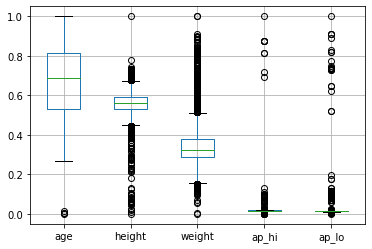

In [35]:
data_scaled.boxplot(column = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'])

Creating Outlier Filters using Record Blood Pressures

In [17]:
lo_ap_hi_filter = (data["ap_hi"] < 0)
hi_ap_hi_filter = (data["ap_hi"] > 370)
lo_ap_lo_filter = (data["ap_lo"] < 0)
hi_ap_lo_filter = (data["ap_lo"] > 360)

In [18]:
outlier_filter = (lo_ap_hi_filter | hi_ap_hi_filter | lo_ap_lo_filter | hi_ap_lo_filter)
outliers = data[~outlier_filter]

Rescaling Continuous Data after Outlier Filtering & Boxplot of Scaled Data

In [20]:
data_s = MinMaxScaler().fit_transform(outliers[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

In [21]:
data_ = pd.DataFrame(data_s, columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'])

<AxesSubplot:>

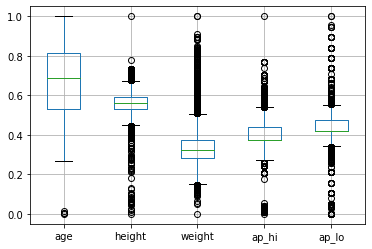

In [22]:
data_.boxplot(column = ['age', 'height', 'weight', 'ap_hi', 'ap_lo'])

In [39]:
data_scaled.describe()

,age,height,weight,ap_hi,ap_lo
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,0.671386,0.560816,0.337940,0.017243,0.015053
std,0.191047,0.042109,0.075775,0.009526,0.017028
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.531630,0.533333,0.289474,0.016698,0.013550
50%,0.689508,0.564103,0.326316,0.016698,0.013550
75%,0.815254,0.589744,0.378947,0.017934,0.014453
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
outliers.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000,68976.000000
mean,19463.886874,1.348788,164.359647,74.121064,126.327491,81.333406,1.364504,1.225934,0.087900,0.053613,0.803279,0.494940
std,2468.373574,0.476590,8.205327,14.330106,17.724443,9.879274,0.678779,0.571893,0.283152,0.225254,0.397522,0.499978
min,10798.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Scaling the Entire Dataset including Continuous and Binary/Multiclass Variables

In [24]:
data_full_scaled = MinMaxScaler().fit_transform(outliers)
data_full_scaled = pd.DataFrame(data_full_scaled, columns = data.columns)

In [25]:
xs = pd.DataFrame(data=data_full_scaled).drop('cardio', axis = 1)
ys = pd.Series(data=data_full_scaled["cardio"])

Distribution of Target

array([[<AxesSubplot:title={'center':'cardio'}>]], dtype=object)

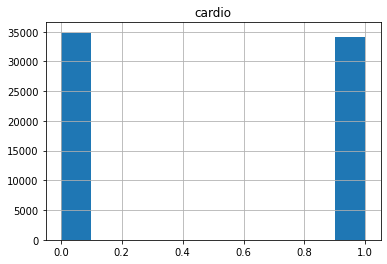

In [26]:
data_full_scaled.hist(column='cardio')

In [38]:
data_full_scaled.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.588076,1.0,0.579487,0.269841,0.341060,0.421053,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730159,0.0,0.517949,0.391534,0.440397,0.473684,1.0,0.0,0.0,0.0,1.0,1.0
2,0.624003,0.0,0.564103,0.280423,0.407285,0.368421,1.0,0.0,0.0,0.0,0.0,1.0
3,0.528455,1.0,0.584615,0.375661,0.473510,0.526316,0.0,0.0,0.0,0.0,1.0,1.0
4,0.516918,0.0,0.517949,0.238095,0.307947,0.315789,0.0,0.0,0.0,0.0,0.0,0.0
